In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import keras
from keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from keras import Model, regularizers

Using TensorFlow backend.
C:\Users\rrkk9\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rrkk9\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rrkk9\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rrkk9\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("test.csv")
test_output = pd.read_csv("titanic.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Name_title     891
dtype: int64

In [18]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Name_title       0
dtype: int64

In [4]:
data=train_data.values

In [5]:
def name_feature(df):
    x = np.zeros((df.shape[0], 17))
    df["Name_title"] = df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
    for i in range(df.shape[0]):
        if df["Name_title"][i] == 'Mr.':
            x[i][0]=1
        elif df["Name_title"][i] == 'Miss.':
            x[i][1]=1
        elif df["Name_title"][i] == 'Mrs.':
            x[i][2]=1
        elif df["Name_title"][i] == 'Master.':
            x[i][3]=1
        elif df["Name_title"][i] == 'Dr.':
            x[i][4]=1
        elif df["Name_title"][i] == 'Rev.':
            x[i][5]=1
        elif df["Name_title"][i] == 'Major.':
            x[i][6]=1
        elif df["Name_title"][i] == 'Mlle.':
            x[i][7]=1
        elif df["Name_title"][i] == 'Col.':
            x[i][8]=1
        elif df["Name_title"][i] == 'Jonkheer.':
            x[i][9]=1
        elif df["Name_title"][i] == 'Sir.':
            x[i][10]=1
        elif df["Name_title"][i] == 'Capt.':
            x[i][11]=1
        elif df["Name_title"][i] == 'Mme.':
            x[i][12]=1
        elif df["Name_title"][i] == 'Ms.':
            x[i][13]=1
        elif df["Name_title"][i] == 'the':
            x[i][14]=1
        elif df["Name_title"][i] == 'Lady.':
            x[i][15]=1
        elif df["Name_title"][i] == 'Don.':
            x[i][16]
    return x

In [6]:
def braces_in_names(df):
    a=np.zeros((df.shape[0],1))
    for i in range(df.shape[0]):
        if not df["Name"][i].replace(' ','').replace(',','').replace('.','').find('(')==-1:
            a[i]=1
        else:
            a[i]=0
    return a

In [7]:
def isNaN(string):
    return string!= string

In [8]:
def data_gen(data,df):
    a0=np.zeros((data.shape[0],2))
    for i in range(data.shape[0]):
        if data[i][3]=='male':
            a0[i][0]=1
        elif data[i][3]=='female':
            a0[i][1]=1
    
    for i in range(data.shape[0]):
        if np.isnan(data[i][4]):
            data[i][4]=train_data["Age"].median(axis=0)
            
    a1=np.zeros((data.shape[0],3))
    for i in range(data.shape[0]):
        if data[i][10]=='S':
            a1[i][0]=1
        elif data[i][10]=='C':
            a1[i][1]=1
        elif data[i][10]=='Q':
            a1[i][2]=1
        else:
            a1[i][0]=1
    
    
    a2=np.zeros((data.shape[0],8))
    b=np.zeros((data.shape[0],4))

    for i in range(data.shape[0]):
        if not isNaN(data[i][9]):
            z=0;q="";
            for j in data[i][9]:
                if j.isdigit():
                    q+=j
                elif j.isalpha():
                    if j=='A':
                        a2[i][0]=1
                    elif j=='B':
                        a2[i][1]=1
                    elif j=='C':
                        a2[i][2]=1
                    elif j=='D':
                        a2[i][3]=1
                    elif j=='E':
                        a2[i][4]=1
                    elif j=='F':
                        a2[i][5]=1
                    elif j=='G':
                        a2[i][6]=1
                    elif j=='T':
                        a2[i][7]=1
                else:
                    if q:
                        b[i][z]=int(q)
                        q=""
                    z+=1
                
            if q:
                b[i][z]=int(q)
    
    a2=np.concatenate((a2,b),axis=1)
    
    a3=np.zeros((data.shape[0],3))
    for i in range(data.shape[0]):
        if data[i][1]==1:
            a3[i][0]=1
        if data[i][1]==2:
            a3[i][1]=1
        if data[i][1]==3:
            a3[i][2]=1
            
    a4=np.zeros((data.shape[0],13))
    for i in range(data.shape[0]):
        if len(data[i][7].split())>1:
            for j, x in enumerate(data[i][7].split()[0].replace('.','').replace('/','')):
                if x.isdigit():
                    a4[i][j]=float(x)
                elif x.isalpha():
                    a4[i][j]=ord(x)
            if len(data[i][7].split())>2:
                if data[i][7].split()[1].replace('.','').isdigit():
                    a4[i][11]=float(data[i][7].split()[1].replace('.',''))
                else:
                    for k, y in enumerate(data[i][7].split()[1]):
                        a4[i][7+k]=ord(y)
            a4[i][12]=int(data[i][7].split()[-1])/100
        else:
            if data[i][7]!='LINE':
                a4[i][7]=len(data[i][7])
                
    a5=name_feature(df)
    
    a6=braces_in_names(df)
            
    a=np.concatenate((a0,a1,a2,a3,a4,a5,a6),axis=1)
    
    X=(data[:,[4,5,6,8]])
    X=np.concatenate((X,a),axis=1)
    
    scaler=StandardScaler()
    sc=scaler.fit(X)
    
    X=X.astype(float)
    
    for i in range(data.shape[0]):
        for j in range(X.shape[1]):
            if X[i][j]==np.nan or isNaN(X[i][j]):
                X[i][j]=sc.mean_[j]
    X=sc.transform(X)
    return X

In [9]:
X=data_gen(data[:,[0,2,3,4,5,6,7,8,9,10,11]],train_data)
# Y=data[:,[1]]
y=train_data["Survived"]
lb=LabelBinarizer()
Y=pd.get_dummies(train_data['Survived']).values

In [10]:
print(Y.shape,X.shape)

(891, 2) (891, 55)


In [11]:
xi=Input(shape=(55,))

x=Dense(128)(xi)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.5)(x)

x=Dense(64)(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.5)(x)

x=Dense(32)(x)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.5)(x)

x=Dense(2)(x)
x=BatchNormalization()(x)
x=Activation('softmax',name="asd")(x)

model=Model(inputs=xi, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, Y, epochs=70, batch_size=128, validation_split=0.3)


Train on 623 samples, validate on 268 samples
Epoch 1/70
623/623 [==============================] - 2s 2ms/step - loss: 0.9565 - accuracy: 0.4222 - val_loss: 0.7568 - val_accuracy: 0.4851
Epoch 2/70
623/623 [==============================] - 0s 107us/step - loss: 0.8899 - accuracy: 0.5024 - val_loss: 0.7080 - val_accuracy: 0.5858
Epoch 3/70
623/623 [==============================] - 0s 103us/step - loss: 0.8005 - accuracy: 0.5474 - val_loss: 0.6788 - val_accuracy: 0.6045
Epoch 4/70
623/623 [==============================] - 0s 96us/step - loss: 0.7371 - accuracy: 0.5634 - val_loss: 0.6561 - val_accuracy: 0.6269
Epoch 5/70
623/623 [==============================] - 0s 103us/step - loss: 0.7237 - accuracy: 0.5923 - val_loss: 0.6346 - val_accuracy: 0.7164
Epoch 6/70
623/623 [==============================] - 0s 102us/step - loss: 0.6727 - accuracy: 0.6453 - val_loss: 0.6168 - val_accuracy: 0.7276
Epoch 7/70
623/623 [==============================] - 0s 96us/step - loss: 0.6445 - accuracy

623/623 [==============================] - 0s 96us/step - loss: 0.4371 - accuracy: 0.8058 - val_loss: 0.4054 - val_accuracy: 0.8396
Epoch 57/70
623/623 [==============================] - 0s 96us/step - loss: 0.4376 - accuracy: 0.8411 - val_loss: 0.4058 - val_accuracy: 0.8396
Epoch 58/70
623/623 [==============================] - 0s 101us/step - loss: 0.4270 - accuracy: 0.8218 - val_loss: 0.4056 - val_accuracy: 0.8321
Epoch 59/70
623/623 [==============================] - 0s 90us/step - loss: 0.4262 - accuracy: 0.8106 - val_loss: 0.4050 - val_accuracy: 0.8321
Epoch 60/70
623/623 [==============================] - 0s 98us/step - loss: 0.4169 - accuracy: 0.8234 - val_loss: 0.4042 - val_accuracy: 0.8284
Epoch 61/70
623/623 [==============================] - 0s 94us/step - loss: 0.4189 - accuracy: 0.8218 - val_loss: 0.4033 - val_accuracy: 0.8284
Epoch 62/70
623/623 [==============================] - 0s 88us/step - loss: 0.4292 - accuracy: 0.8186 - val_loss: 0.4032 - val_accuracy: 0.8284
Epo

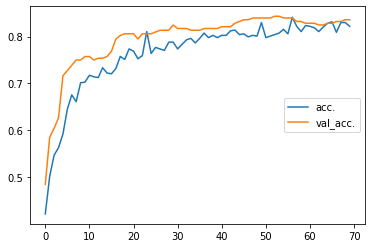

In [12]:
plt.plot(history.history["accuracy"],label="acc.")
plt.plot(history.history["val_accuracy"],label="val_acc.")
plt.legend(loc="center right")

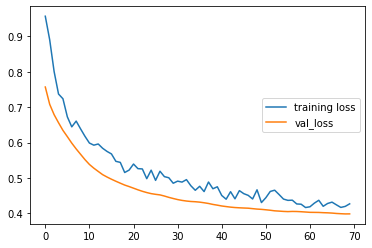

In [13]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="center right")

In [14]:
X_t=test_data.values
X_test=data_gen(X_t,test_data)
Y_test=pd.get_dummies(test_output['Survived']).values
print(X_test.shape,Y_test.shape)

(418, 55) (418, 2)


In [15]:
model.evaluate(X_test,Y_test)

418/418 [==============================] - 0s 86us/step


[0.4980700760366814, 0.7751196026802063]

So the model gives loss = 0.498 with accuracy of 77.512%.

In [16]:
z=np.round(model.predict(X_test))==Y_test

In [28]:
#printing wrong predictions.
s=0
for i in range(X_test.shape[0]):
    if z[i][0]==False:
        print(str(i),test_output['Survived'][i],X_t[i])
        s+=1

1 1 [893 3 'Wilkes, Mrs. James (Ellen Needs)' 'female' 47.0 1 0 '363272' 7.0
 nan 'S']
4 1 [896 3 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)' 'female' 22.0 1 1
 '3101298' 12.2875 nan 'S']
5 1 [897 3 'Svensson, Mr. Johan Cervin' 'male' 14.0 0 0 '7538' 9.225 nan 'S']
6 0 [898 3 'Connolly, Miss. Kate' 'female' 30.0 0 0 '330972' 7.6292 nan 'Q']
7 1 [899 2 'Caldwell, Mr. Albert Francis' 'male' 26.0 1 1 '248738' 29.0 nan
 'S']
18 0 [910 3 'Ilmakangas, Miss. Ida Livija' 'female' 27.0 1 0 'STON/O2. 3101270'
 7.925 nan 'S']
19 1 [911 3 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'female' 45.0 0 0 '2696'
 7.225 nan 'C']
23 1 [915 1 'Williams, Mr. Richard Norris II' 'male' 21.0 0 1 'PC 17597'
 61.3792 nan 'C']
32 1 [924 3 'Dean, Mrs. Bertram (Eva Georgetta Light)' 'female' 33.0 1 2
 'C.A. 2315' 20.575 nan 'S']
34 1 [926 1 'Mock, Mr. Philipp Edmund' 'male' 30.0 1 0 '13236' 57.75 'C78' 'C']
36 1 [928 3 'Roth, Miss. Sarah A' 'female' 28.0 0 0 '342712' 8.05 nan 'S']
38 1 [930 3 'Sap, Mr. Julius' 'male

In [29]:
print(s)                              #total number of wrong predictions.

94
